## Práctico

Utilizar la base de jugadores “players_20.csv” disponible en la página de Kaggle https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv . Considerar que la base 2020 no tiene el mismo formato que la base vista en clase, a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde.

Con la nueva base, realizar un análisis análogo al que realizamos en el cursado de la materia con los datos FIFA2019 (Basarse en las notebooks ntb_clustering_1_fifa2019, ntb_clustering_2_fifa2019 y ntb3_embeddings_fifa2019). Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio (sintético, no muy extenso) .

2- Evaluación visual  e intuitiva de a dos variables por vez.

3- Uso de técnicas de clustering: k-Medias, Mean Shift, agregar alguna jerárquica vista en el teórico (sugerencia: usar 'cityblock' como distancia en el jerárquico).

4- Análisis de los clusters encontrados.

5- Embeddings y técnicas de clustering.

6- Evaluación.

7- Pregunta: ¿Se realizó alguna normalización de la base? ¿Por qué ?



## Inicialización del entorno

In [1]:
from math import ceil
from PIL import Image
import requests
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

## 1. Análisis exploratorio

### Carga y descripción general del set de datos

In [2]:
# Carga del set de datos
df = pd.read_csv('https://raw.githubusercontent.com/martinbas/tp_ANS/main/players_20.csv')
df.head(4)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         NaN          NaN   
3        NaN     NaN       87.0         92.0        78.0         89.0   

   gk_speed  gk_positioning  \
0       NaN             NaN   
1       NaN             NaN   
2       NaN             NaN   
3      52.0            90.0   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   
1  Long Throw-in, Selfish, Argues with Officials,...                  84   
2  Power Free-Kick, Injury Free, Selfish, Early C...                  87   
3                         Flair, Acrobatic Clearance                

In [3]:
# se muestran las variables contenidas en el dataset imprimiendo las diferentes columnas
col = []
print('El dataset posee', len(df.columns), 'columnas, las cuales se listan a continuación:')
[col.append(i) for i in df.columns]
col = pd.DataFrame(np.array(col).reshape(26, 4))
col

El dataset posee 104 columnas, las cuales se listan a continuación:


0                        1  \
0                  sofifa_id               player_url   
1                        age                      dob   
2                nationality                     club   
3                  value_eur                 wage_eur   
4   international_reputation                weak_foot   
5                  body_type                real_face   
6              team_position       team_jersey_number   
7       contract_valid_until          nation_position   
8                   shooting                  passing   
9                     physic                gk_diving   
10               gk_reflexes                 gk_speed   
11        attacking_crossing      attacking_finishing   
12         attacking_volleys          skill_dribbling   
13        skill_long_passing       skill_ball_control   
14          movement_agility       movement_reactions   
15             power_jumping            power_stamina   
16      mentality_aggression  mentality_interceptions   
17       mentality_penalties      mentality_composure   
18  defending_sliding_tackle       goalkeeping_diving   
19   goalkeeping_positioning     goalkeeping_reflexes   
20                        rs                       lw   
21                        rf                       rw   
22                       ram                       lm   
23                       rcm                       rm   
24                       cdm                      rdm   
25                       lcb                       cb   

                             2                          3  
0                   short_name                  long_name  
1                    height_cm                  weight_kg  
2                      overall                  potential  
3             player_positions             preferred_foot  
4                  skill_moves                  work_rate  
5           release_clause_eur                player_tags  
6                  loaned_from                     joined  
7         nation_jersey_number                       pace  
8                    dribbling                  defending  
9                  gk_handling                 gk_kicking  
10              gk_positioning              player_traits  
11  attacking_heading_accuracy    attacking_short_passing  
12                 skill_curve          skill_fk_accuracy  
13       movement_acceleration      movement_sprint_speed  
14            movement_balance           power_shot_power  
15              power_strength           power_long_shots  
16       mentality_positioning           mentality_vision  
17           defending_marking  defending_standing_tackle  
18        goalkeeping_handling        goalkeeping_kicking  
19                          ls                         st  
20                          lf                         cf  
21                         lam                        cam  
22                         lcm                         cm  
23                         lwb                        ldm  
24                         rwb                         lb  
25                         rcb                         rb

### Clasificación arbitraria de habilidades

In [4]:
# A partir de la visualización de columnas detalladas en la celda anterior, 
# decidimos seleccionar las siguientes variables:

# Identificacion del jugador 
var_jugador   = ['short_name'               , 'player_positions'      , 'team_position'             , 
                 'club'                     ,  
                 ]

# características generales de los jugadores
var_generales = ['overall'      
                 ]
# selección arbitraria de habilidades relacionadas con el ataque
var_ataque    = ['attacking_crossing'       , 'attacking_finishing'   , 'attacking_heading_accuracy',
                 'skill_ball_control'       , 'movement_acceleration' , 'movement_sprint_speed'     ,
                 'movement_agility'         , 'movement_reactions'    , 'movement_balance'          , 
                 'power_shot_power'         , 'mentality_penalties'   , 'power_long_shots'          ,
                 'attacking_short_passing'  , 'attacking_volleys'     , 'skill_dribbling'           ,
                 'skill_curve'              , 'skill_fk_accuracy'     , 'skill_long_passing'        ,
                 ]

# selección arbitraria de habilidades relacionadas con la defensa
var_defensa   = ['mentality_aggression'     , 'mentality_interceptions', 'mentality_positioning'    ,
                 'mentality_vision'         , 'defending_marking'      , 'defending_standing_tackle',
                 'defending_sliding_tackle' , 'power_stamina'          , 'power_strength'         
                 ]

var_arquero   = ['goalkeeping_diving'       , 'goalkeeping_handling'   , 'goalkeeping_kicking'      ,
                 'goalkeeping_positioning'  , 'goalkeeping_reflexes'
                 ]

df_skills = df[var_jugador + var_generales + var_ataque + var_defensa + var_arquero] 

In [5]:
# Dado que todas las variables con las que vamos a trabajar se definen dentro del rango 0 - 100
# no vamos a realizar normalización de la base
df_skills.describe()

overall  attacking_crossing  attacking_finishing  \
count  18278.000000        18278.000000         18278.000000   
mean      66.244994           49.718405            45.590218   
std        6.949953           18.325403            19.594609   
min       48.000000            5.000000             2.000000   
25%       62.000000           38.000000            30.000000   
50%       66.000000           54.000000            49.000000   
75%       71.000000           64.000000            62.000000   
max       94.000000           93.000000            95.000000   

       attacking_heading_accuracy  skill_ball_control  movement_acceleration  \
count                18278.000000        18278.000000           18278.000000   
mean                    52.221468           58.461976              64.299923   
std                     17.428429           16.741878              15.042232   
min                      5.000000            5.000000              12.000000   
25%                     44.000000           54.000000              56.000000   
50%                     56.000000           63.000000              67.000000   
75%                     64.000000           69.000000              75.000000   
max                     93.000000           96.000000              97.000000   

       movement_sprint_speed  movement_agility  movement_reactions  \
count           18278.000000      18278.000000        18278.000000   
mean               64.415746         63.504924           61.752544   
std                14.847763         14.808380            9.135613   
min                11.000000         11.000000           21.000000   
25%                57.000000         55.000000           56.000000   
50%                67.000000         66.000000           62.000000   
75%                75.000000         74.000000           68.000000   
max                96.000000         96.000000           96.000000   

       movement_balance  power_shot_power  mentality_penalties  \
count      18278.000000      18278.000000         18278.000000   
mean          63.856439         58.181694            48.383357   
std           14.201559         13.326083            15.708099   
min           12.000000         14.000000             7.000000   
25%           56.000000         48.000000            39.000000   
50%           66.000000         59.000000            49.000000   
75%           74.000000         68.000000            60.000000   
max           97.000000         95.000000            92.000000   

       power_long_shots  attacking_short_passing  attacking_volleys  \
count      18278.000000             18278.000000       18278.000000   
mean          46.812945                58.748003          42.809388   
std           19.322343                14.679653          17.701815   
min            4.000000                 7.000000           3.000000   
25%           32.000000                54.000000          30.000000   
50%           51.000000                62.000000          44.000000   
75%           62.000000                68.000000          56.000000   
max           94.000000                92.000000          90.000000   

       skill_dribbling   skill_curve  skill_fk_accuracy  skill_long_passing  \
count     18278.000000  18278.000000       18278.000000        18278.000000   
mean         55.596509     47.325692          42.708885           52.768848   
std          18.929118     18.422991          17.433612           15.246454   
min           4.000000      6.000000           4.000000            8.000000   
25%          50.000000     34.000000          31.000000           43.000000   
50%          61.000000     49.000000          41.000000           56.000000   
75%          68.000000     62.000000          56.000000           64.000000   
max          97.000000     94.000000          94.000000           92.000000   

       mentality_aggression  mentality_interceptions  mentality_positioning  \
count          18278.000000             18278.000000     

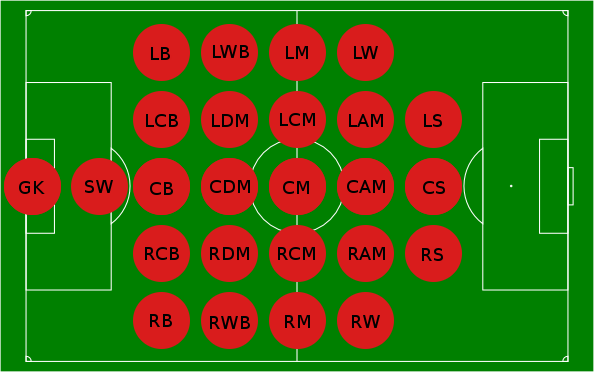

In [6]:
# Teniendo en cuenta la siguiente imagen de las posiciones de los jugadores en la cancha,
# realizaremos la agrupación de posiciones en ataque, mediocampo, defensa y arquero
Image.open(requests.get('https://www.guidetofootball.com/wp-content/uploads/playing-positions.png', stream=True).raw)

En la siguiente línea de código vamos a definir listas de posiciones en el campo agrupadas por posiciones de campo generales (ataque, mediocampo, defensa y arquero).

Estas variables corresponderían a la variable target en caso de aprendizaje supervizado si pretendiéramos predecir la posición del jugador.

En este caso las vamos a usar para visualizar la distribución de las habilidades según la posición y los clusters formados. 

In [7]:
pos_del   = ['RW' , 'LW'  , 'CAM' , 'ST'  , 'LS'  , 
             'CF' , 'LAM' , 'LF'  , 'RF'  , 'RAM' , 
             'RS'
             ]

pos_med   = ['RCM'  , 'LCM' ,
             'RM'   , 'LM'  , 'CM'
             ]

pos_def   = ['LCB'  , 'CDM' , 'LB'  , 'RB'  , 'RDM' , 
             'RWD'  , 'LWD' , 'CB'  , 'RCB' , 'LDM' ,
             'LWB'  , 'RWB'
             ]

pos_arq   = ['GK']

In [8]:
# generamos una nueva columna con la posición general del jugador (delantero, defensa, mediocampista o arquero)

df_skills['player_position_general'] = None
df_skills.loc[:, 'player_position_general'] = df_skills.player_positions.copy()
c = 0
for pos in df_skills.player_position_general:
  if pos.split(',')[0] in (pos_del):
    df_skills.loc[c, 'player_position_general'] = 'del'
  if pos.split(',')[0] in (pos_med):
    df_skills.loc[c, 'player_position_general'] = 'med'
  if pos.split(',')[0] in (pos_def):
    df_skills.loc[c, 'player_position_general'] = 'def'
  if pos.split(',')[0] in (pos_arq):
    df_skills.loc[c, 'player_position_general'] = 'arq'
  c += 1

### Descripción de habilidades según las posiciones en la cancha

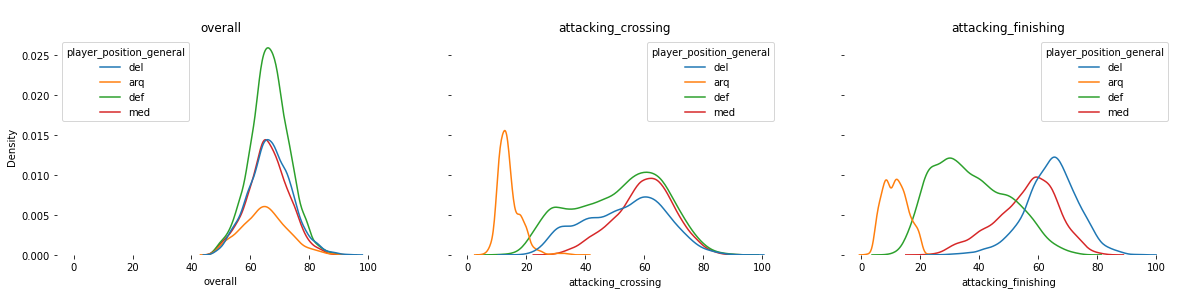

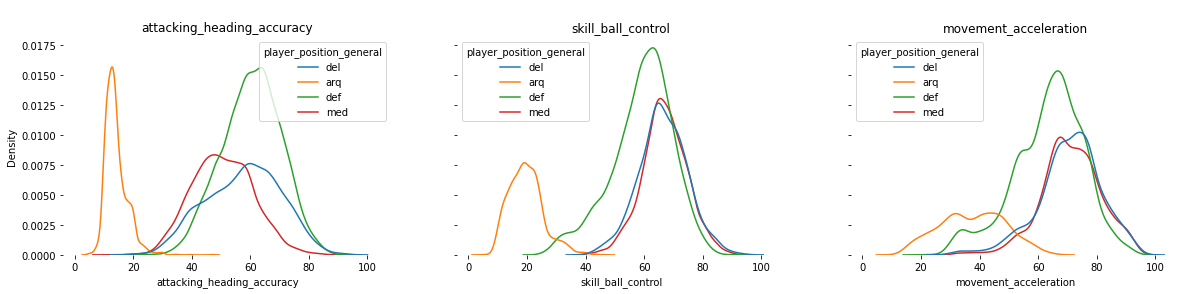

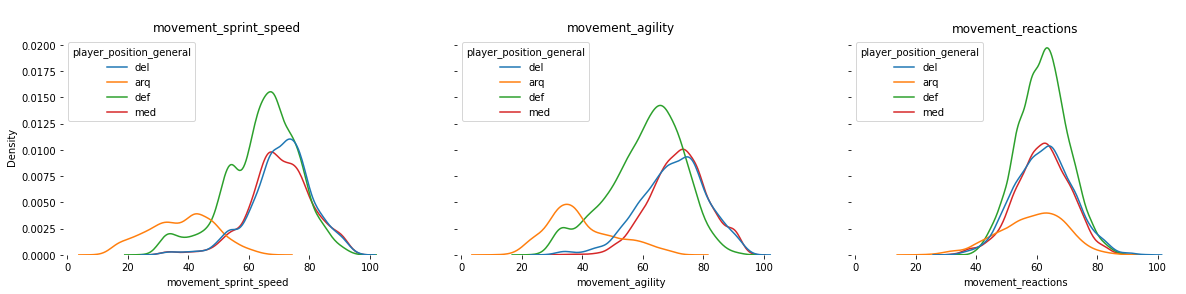

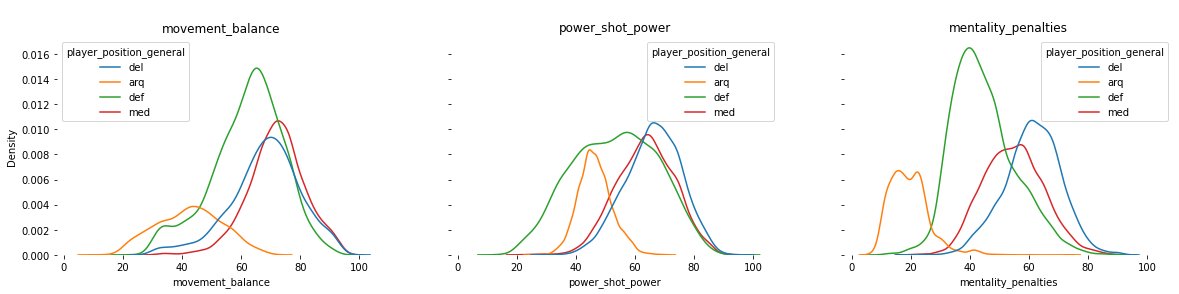

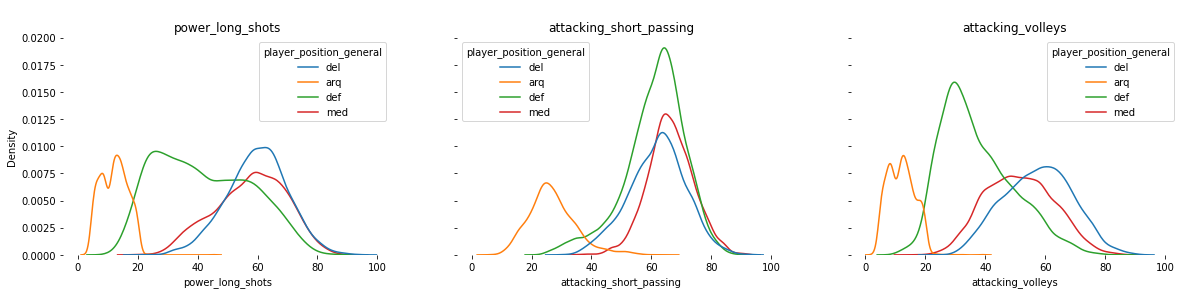

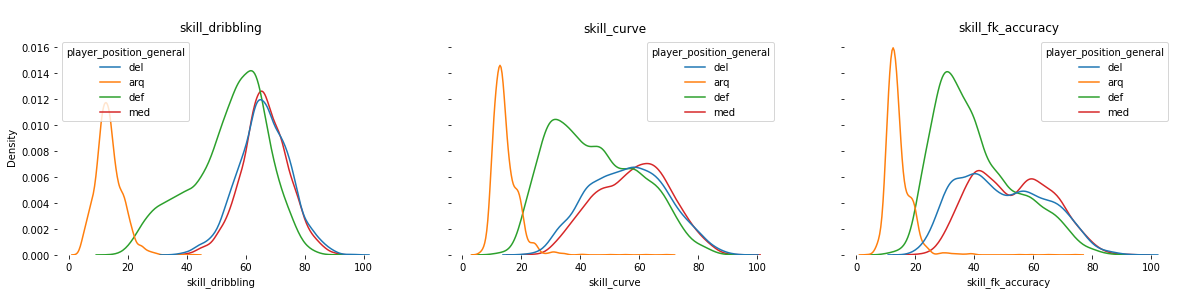

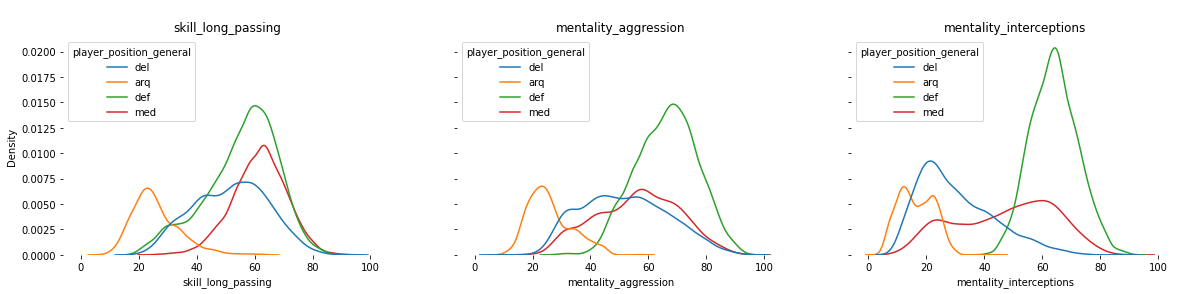

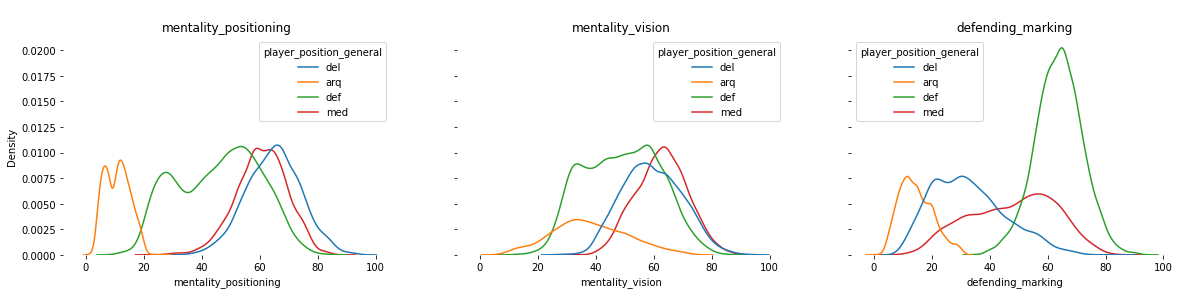

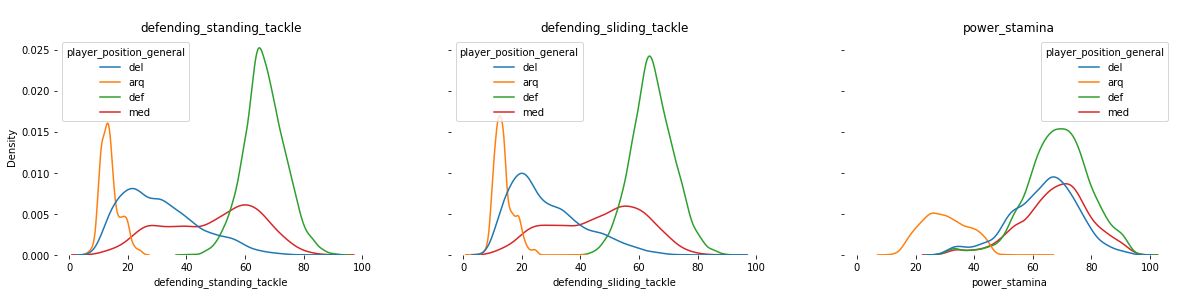

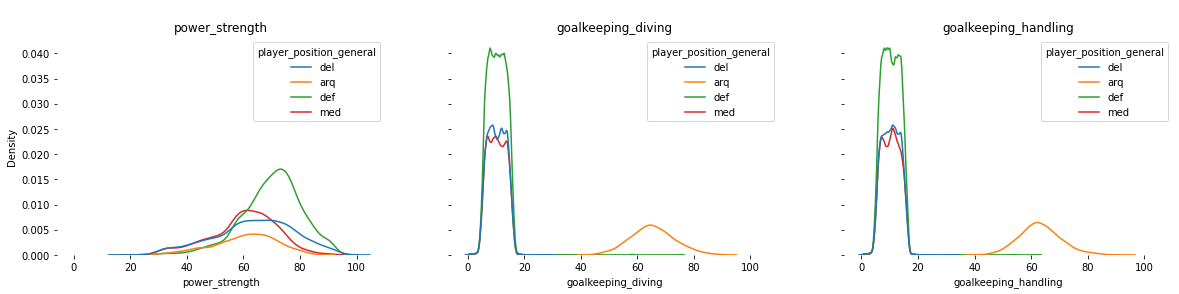

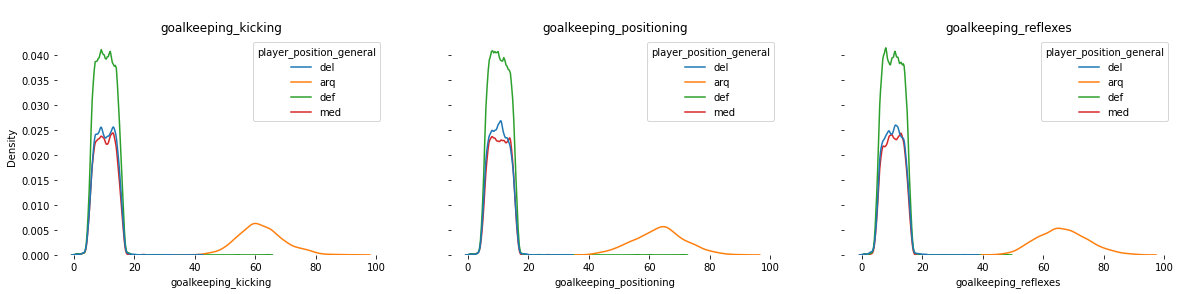

In [9]:
sk = df_skills.columns[4:-1]
for i in range(0, len(sk), 3):
  fig, ax = plt.subplots(1, 3, figsize=(20,4), sharex=True, sharey=True)
  if i == len(sk): break
  # ax1 = sns.kdeplot
  ax1 = sns.kdeplot(ax=ax[0], x=df_skills[sk[i]], hue=df_skills.player_position_general)
  ax1.title.set_text('\n'+sk[i])
  if (i+1) == len(sk): break
  ax2 = sns.kdeplot(ax=ax[1], x=df_skills[sk[i+1]], hue=df_skills.player_position_general)
  ax2.title.set_text('\n'+sk[i+1])
  if (i+2) == len(sk): break
  ax3 = sns.kdeplot(ax=ax[2], x=df_skills[sk[i+2]], hue=df_skills.player_position_general)
  ax3.title.set_text('\n'+sk[i+2])
  sns.despine(left=True, bottom=True)
  plt.show()

Muchas de las variables visualmente parecen distribuírse de con una forma cercana a l
A partir de la visualización anterior, decidimos elegir 3 variables relacionadas al ataque y 3 relacionadas a la defensa, las cuales generan diferencias apreciables entre delanteros y defensores y en menor medida tambíen con mediocampistas. 

Estas variables 6 variables van a ser utilizadas para la visualización de la distribución de los datos de a dos variuables por vez. 

## 2. Evaluación visual e intuitiva de a dos variables por vez

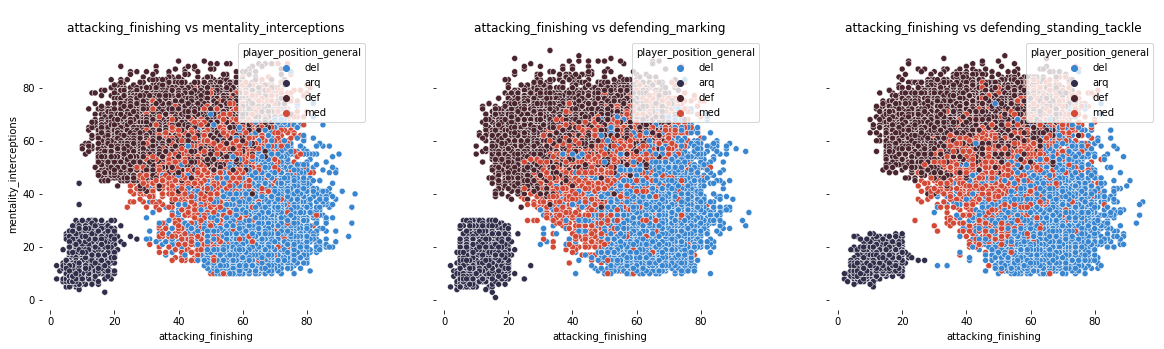

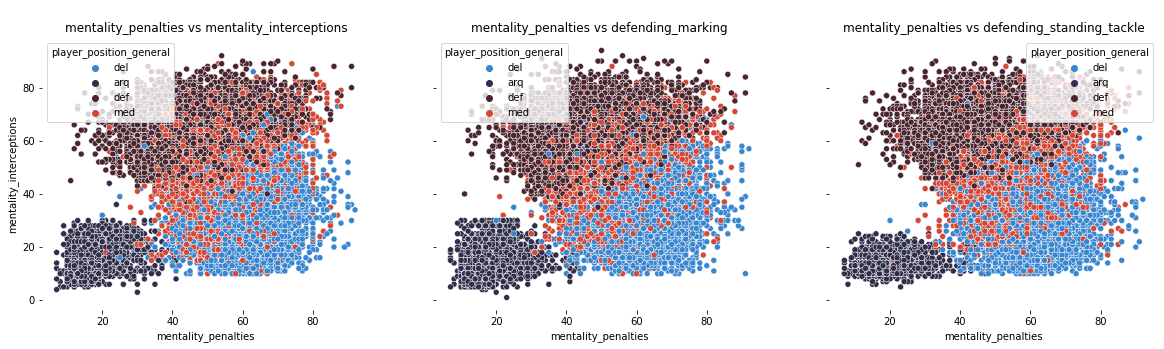

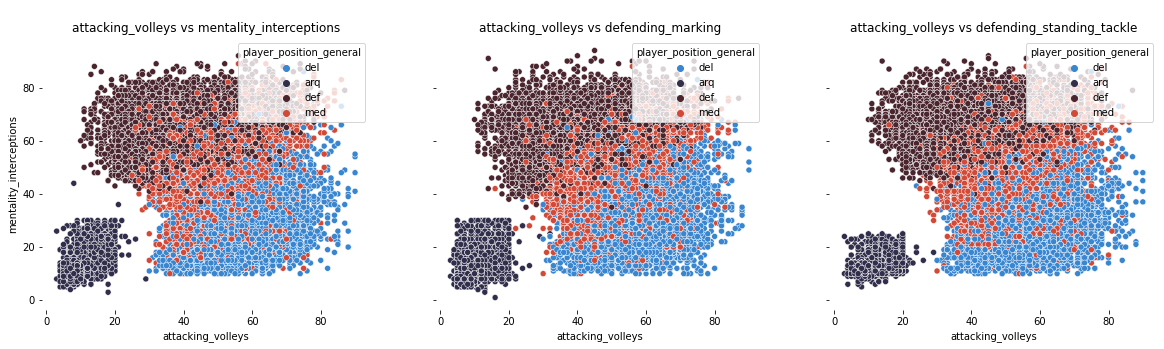

In [10]:
sk_a = ['attacking_finishing'     , 'mentality_penalties' , 'attacking_volleys'         ]
sk_d = ['mentality_interceptions' , 'defending_marking'   , 'defending_standing_tackle' ]
sk = df_skills.columns[4:-1]
for a in range(len(sk_a)):
  fig, ax = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)
  ax1 = sns.scatterplot(ax=ax[0], x=df_skills[sk_a[a]], y=df_skills[sk_d[0]],
                        hue=df_skills.player_position_general, palette='icefire')
  ax1.title.set_text('\n'+sk_a[a]+' vs '+sk_d[0])
  ax2 = sns.scatterplot(ax=ax[1], x=df_skills[sk_a[a]], y=df_skills[sk_d[1]],
                        hue=df_skills.player_position_general, palette='icefire')
  ax2.title.set_text('\n'+sk_a[a]+' vs '+sk_d[1])
  ax3 = sns.scatterplot(ax=ax[2], x=df_skills[sk_a[a]], y=df_skills[sk_d[2]],
                        hue=df_skills.player_position_general, palette='icefire')
  ax3.title.set_text('\n'+sk_a[a]+' vs '+sk_d[2])
  sns.despine(left=True, bottom=True)
  plt.show()

## 3. Embeddings

### 3.1. Agrupamiento de características

#### Preparación del set de datos para la evaluación de clustering

In [11]:
# Se eliminan aquellas filas con valores nulos
df_skills = df_skills.dropna()

# Se genera una nuevo dataset, eliminando las columnas referidas a la 
# descripción no numérica del jugador y su posición 
df_skills_copy = df_skills.copy()
df_skills = df_skills.loc[:, df_skills.columns[4:-1]]

#### Eliminación de características con poca varianza:
- A partir de este análisis eliminamos las features 'overall', movement_reactions y power_strength, ya que poseen una varianza considerablemente menor al resto de las características 

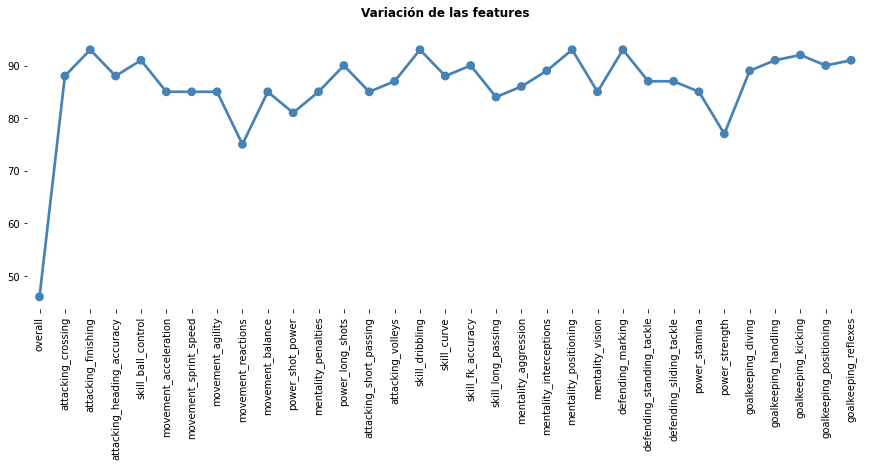

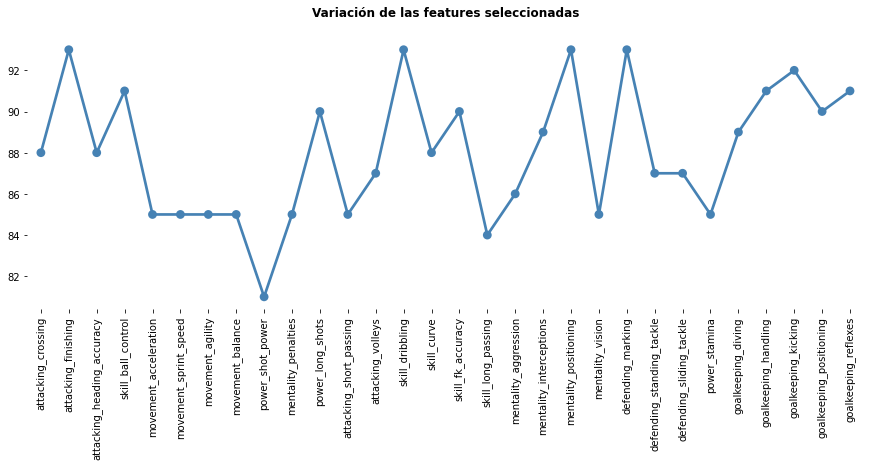

In [12]:
from sklearn.feature_selection import VarianceThreshold

# visualización de la varianza de las características
plt.figure(figsize=(15, 5))
selector = VarianceThreshold()
selector.fit_transform(df_skills)
sns.pointplot(x=df_skills.columns, 
              y=selector.variances_, 
              color='steelblue')
plt.xticks(rotation=90)
plt.title('Variación de las features\n', fontweight="bold")
sns.despine(left=True, bottom=True)
plt.show()

# Eliminación de las features con varianza inferior a 80 (arbitrario) 
plt.figure(figsize=(15, 5))
df_skills = df_skills.drop(columns=['overall', 'movement_reactions', 'power_strength'])
selector = VarianceThreshold()
selector.fit_transform(df_skills)
sns.pointplot(x=df_skills.columns, 
              y=selector.variances_, 
              color='steelblue')
plt.xticks(rotation=90)
plt.title('Variación de las features seleccionadas\n', fontweight="bold")
sns.despine(left=True, bottom=True)
plt.show()

#### Agrupamiento de características redundantes
- Agruparemos aquellas features que posean una dependencia mayor a 0.90 (cuadrados rojos en el heatmap). El valor de elijió arbitrariamente

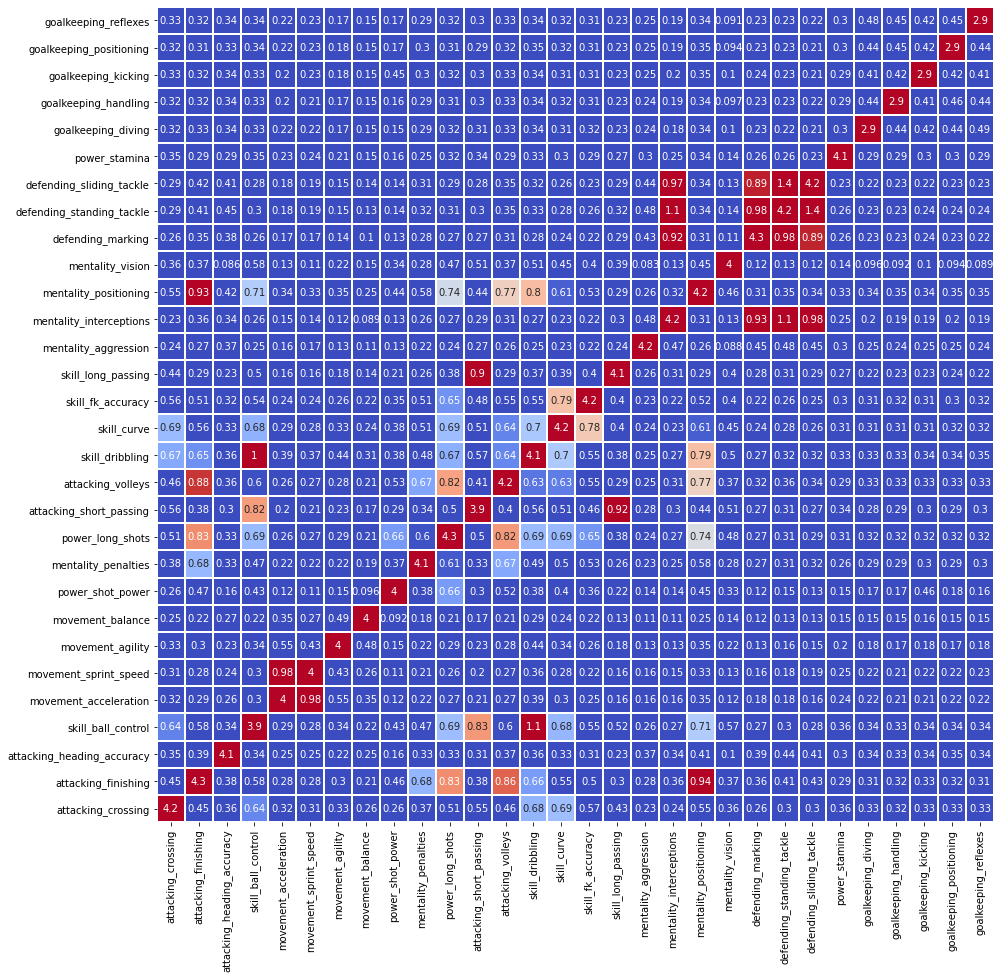

In [13]:
# Visualización de la dependencia entre variables para eliminar variables redundantes
from sklearn.feature_selection import mutual_info_classif
cols = df_skills.columns
h_matrix = pd.DataFrame({})
for i in range(len(cols)):
  data = df_skills.copy()
  c = data.columns #[data.columns !=cols[i]] 
  data = data.loc[:, c] 
  m = mutual_info_classif(X=data, y=df_skills[cols[i]])
  h_matrix[df_skills.columns[i]] = m

plt.figure(figsize=(15, 15))
sns.heatmap(data=h_matrix, yticklabels=h_matrix.columns, 
            annot=True, cbar=False, cmap='coolwarm', linewidth=1, vmin=0.6, vmax=0.9).invert_yaxis()

##### A partir del análisis visual del mapa de calor se realizan las siguientes agrupaciones:
- attacking_finishing_joined =  attacking_finishing + mentality_positioning
- skill_ball_control_joined =  skill_ball_control + skill_dribbing
- acceleration_joined = movement_acceleration + movement_sprint_speed
- passing_joined = attacking_short_passing + skill_long_passing
- defense_joined = mentality_interceptions + defending_marking + defending_standing_tackle + defending_sliding_tackle

In [14]:
df_skills['attack_joined'] = df_skills[['attacking_finishing',
                                                     'mentality_positioning'
                                                     ]].aggregate('mean', 1)

df_skills['skill_ball_control_joined'] = df_skills[['skill_ball_control',
                                                    'skill_dribbling'
                                                    ]].aggregate('mean', 1)

df_skills['acceleration_joined'] = df_skills[['movement_acceleration',
                                              'movement_sprint_speed'
                                              ]].aggregate('mean', 1)

df_skills['passing_joined'] = df_skills[['attacking_short_passing',
                                         'skill_long_passing'
                                         ]].aggregate('mean', 1)

df_skills['defense_joined'] = df_skills[['mentality_interceptions',
                                           'defending_marking', 
                                           'defending_standing_tackle',
                                           'defending_sliding_tackle'
                                           ]].aggregate('mean', 1)

df_skills = df_skills.drop(['attacking_finishing', 
                            'mentality_positioning',
                            'skill_ball_control',
                            'skill_dribbling',
                            'movement_acceleration', 
                            'movement_sprint_speed',
                            'attacking_short_passing', 
                            'skill_long_passing',
                            'mentality_interceptions', 
                            'defending_marking',
                            'defending_standing_tackle',
                            'defending_sliding_tackle'
                            ], axis=1)

### 3.2. Principal component analysis

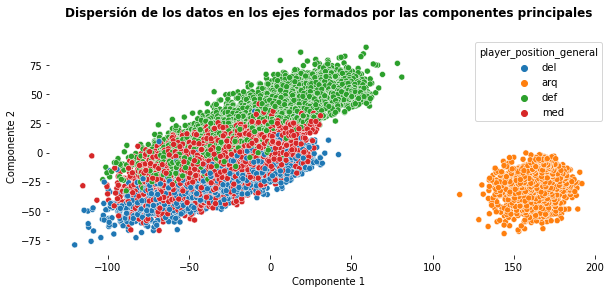


La primer componente explica el  63.86  % de la variación 

La segunda componente explica el  13.45  % de la variación


In [15]:
from sklearn.decomposition import PCA
df_pca          = df_skills.copy()
pca             = PCA(n_components=2, random_state=33)
pca.fit(df_pca)
df_skills_pca   = pca.fit_transform(df_pca)
pca_comp_1      = df_skills_pca[:,0]    # distribución en la componente principal 1
pca_comp_2      = df_skills_pca[:, 1]   # distribución en la componente principal 2
plt.figure(figsize=(10,4))
sns.scatterplot(x=pca_comp_1, y=pca_comp_2, hue=df_skills_copy.player_position_general)
plt.title('Dispersión de los datos en los ejes formados por las componentes principales\n', fontweight='bold')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
sns.despine(left=True, bottom=True)
plt.show()
print('\nLa primer componente explica el ', round(pca.explained_variance_ratio_[0]*100, 2), ' % de la variación',
      '\n\nLa segunda componente explica el ', round(pca.explained_variance_ratio_[1]*100, 2), ' % de la variación')

### 3.3. t-SNE

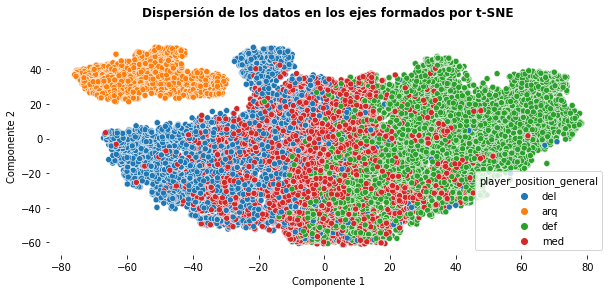

In [16]:
from sklearn.manifold import TSNE

df_tsne         = df_skills.copy()
tsne            = TSNE(n_components=2, random_state=33)
tsne.fit(df_tsne)
df_skills_tsne  = TSNE(n_components=2).fit_transform(df_tsne)
tsne_comp_1     = df_skills_tsne[:,0]
tsne_comp_2     = df_skills_tsne[:, 1]
plt.figure(figsize=(10,4))
sns.scatterplot(x=tsne_comp_1, y=tsne_comp_2, hue=df_skills_copy.player_position_general)
plt.title('Dispersión de los datos en los ejes formados por t-SNE\n', fontweight="bold")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
sns.despine(left=True, bottom=True)
plt.show()

## 4. Clustering

### 4.1. Clustering: Kmeans

Text(0.5, 1.0, 'Inertia of k-Means vs number of clusters\n')

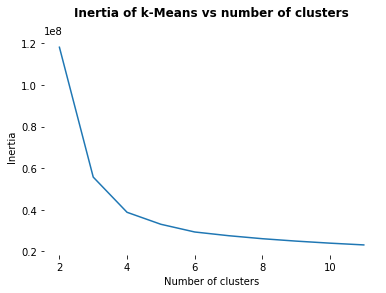

In [17]:
from sklearn.cluster  import KMeans
from sklearn          import decomposition

#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+1).fit(df_skills).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
sns.despine(left=True, bottom=True)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means vs number of clusters\n", fontweight='bold')

In [18]:
# Número de clusters buscado
n_clust = 4

model = KMeans(n_clusters=n_clust, random_state=5)
model.fit(df_skills)

# Recuperacion de etiquetas
km_clusters = model.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', int(model.inertia_))

Suma de los cuadrados de las distancias al cluster / Inertia:  33026523


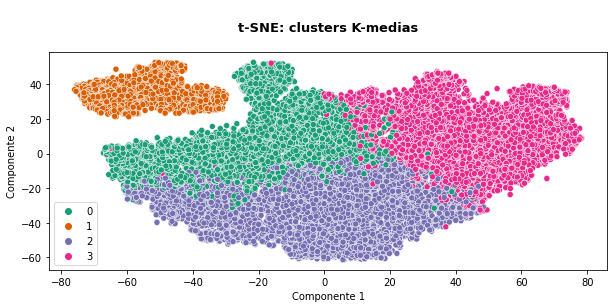

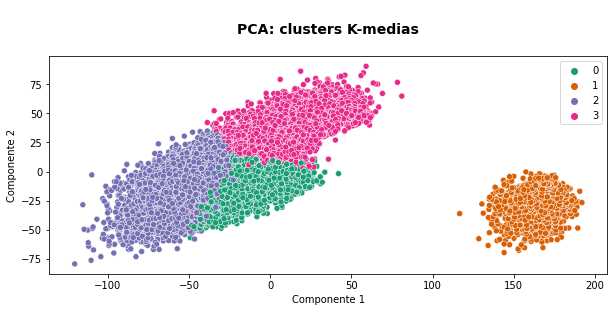

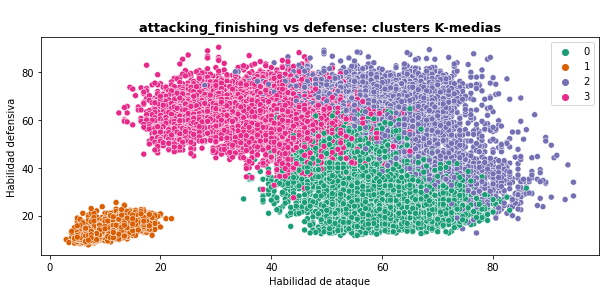

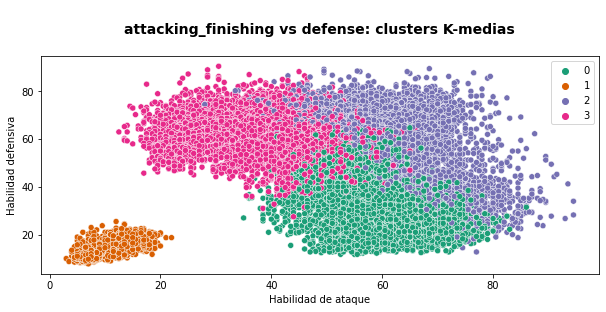

In [19]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=tsne_comp_1, y=tsne_comp_2, 
                data=df_skills, hue=km_clusters, palette='Dark2')
plt.title('\nt-SNE: clusters K-medias\n', 
          fontsize=13, fontweight="bold")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()
plt.figure(figsize=(10, 4))
sns.scatterplot(x=pca_comp_1, y=pca_comp_2,
                hue=km_clusters, palette='Dark2')
plt.title('\nPCA: clusters K-medias\n', 
          fontsize=14, fontweight="bold")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(x=df_skills.attack_joined, y=df_skills.defense_joined, 
                data=df_skills, hue=km_clusters, palette='Dark2')
plt.title('\nattacking_finishing vs defense: clusters K-medias', 
          fontsize=13, fontweight="bold")
plt.xlabel('Habilidad de ataque')
plt.ylabel('Habilidad defensiva')
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(x=df_skills.attack_joined, y=df_skills.defense_joined,
                hue=km_clusters, palette='Dark2')
plt.title('\nattacking_finishing vs defense: clusters K-medias\n', 
          fontsize=14, fontweight="bold")
plt.xlabel('Habilidad de ataque')
plt.ylabel('Habilidad defensiva')
plt.show()

A partir de los gráficos anteriores podemos obser que formando a la formación de 4 clusters con k-medias se obtienen agrupaciones coherentes con las posiciones generales en la cancha. 

En este sentido, el cluster naranja representaría a los arqueros (extremo izquierdo inferior = baja habilidad defensiva y de ataque). El cluster rosa representaría a los defensores debido a que poseen elevada habilidad defensiva y baja habilidad de ataque. El cluster verde representaría a los delanteros, ya que presentan elevada habilidad de ataque y baja defensiva y el cluster lila los mediocampistas.

En este sentido, en el código siguiente calculamos el accuracy score de los cluster generados utilizando como variable target a la posición general en la cancha obteniéndo un accuracy de 67% 

In [20]:
from sklearn.metrics import accuracy_score

y_true = df_skills_copy.player_position_general.copy()

y_true[y_true == 'def'] = 3
y_true[y_true == 'arq'] = 1
y_true[y_true == 'med'] = 2
y_true[y_true == 'del'] = 0

y_pred = km_clusters
y_true = np.asarray([i for i in y_true])

print('accuracy: ', round(accuracy_score(y_true, y_pred)*100, 1), '%')
# accuracy_score(y_true, y_pred)

accuracy:  67.0 %


Para n_clusters = 2 El silhouette_score promedio es : 0.62
Para n_clusters = 3 El silhouette_score promedio es : 0.32
Para n_clusters = 4 El silhouette_score promedio es : 0.27
Para n_clusters = 5 El silhouette_score promedio es : 0.26
Para n_clusters = 6 El silhouette_score promedio es : 0.23


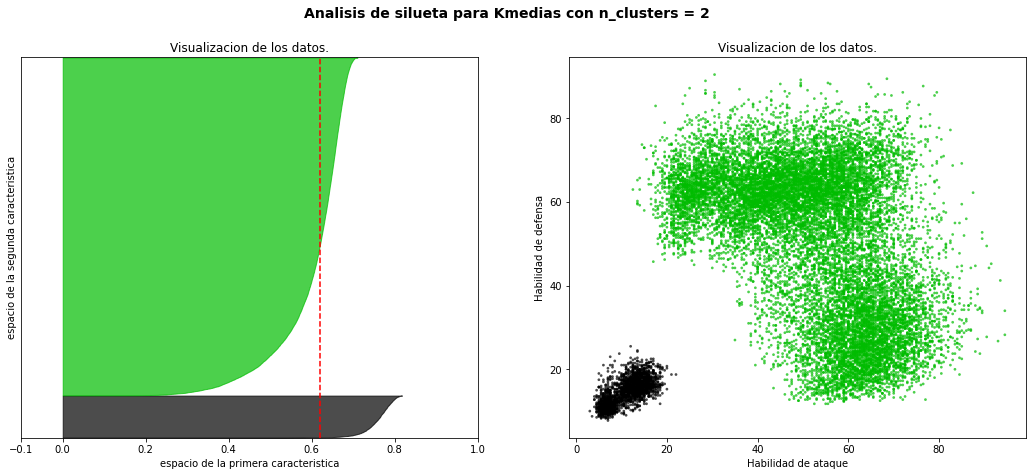

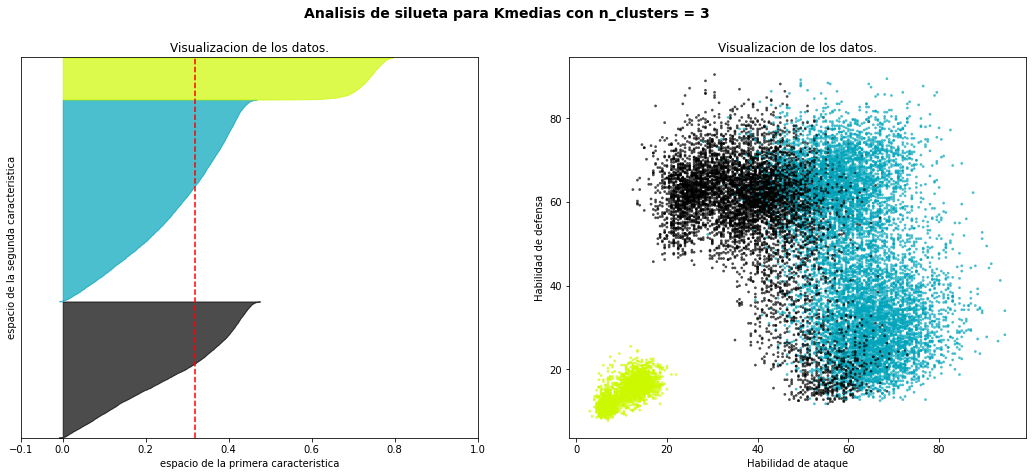

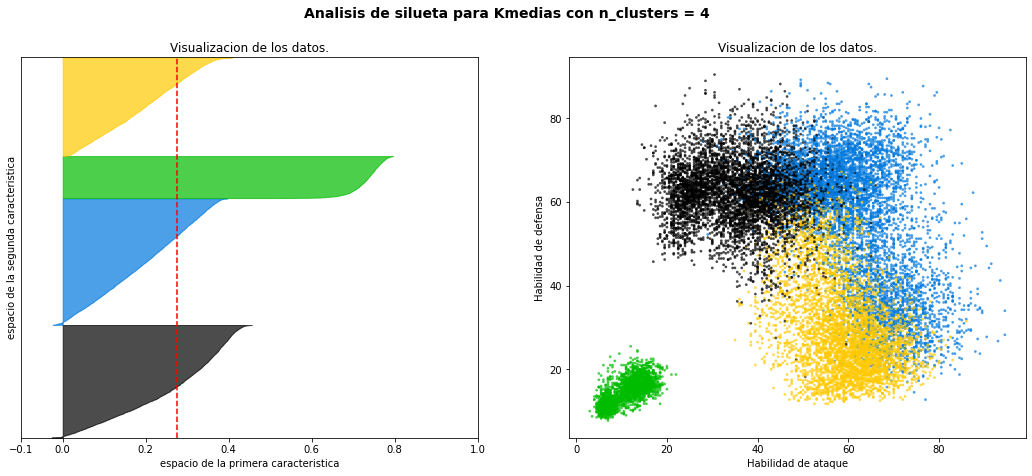

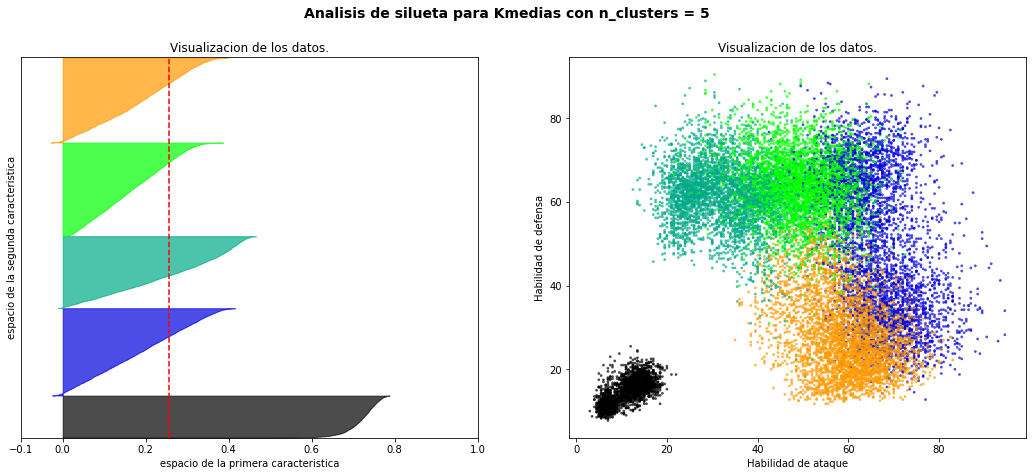

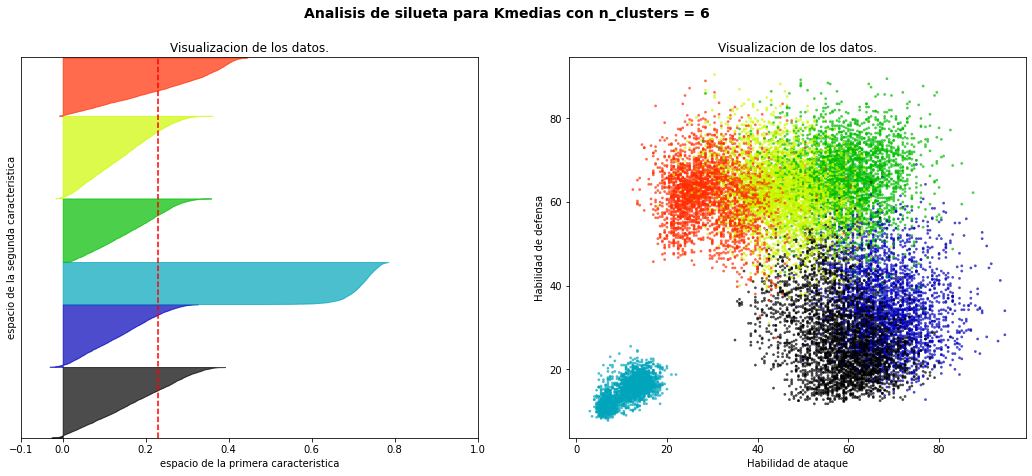

In [21]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X, y = df_skills, df_skills_copy.player_position_general
range_n_clusters = [2,3, 4, 5, 6]
sse ={}
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    sse[n_clusters] = clusterer.inertia_

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", round(silhouette_avg, 2))

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        y_lower = y_upper + 10

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("espacio de la primera caracteristica")
    ax1.set_ylabel("espacio de la segunda caracteristica")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.loc[:, 'attack_joined'], X.loc[:, 'defense_joined'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    ax2.set_title("Visualizacion de los datos.")
    ax2.set_xlabel('Habilidad de ataque')
    ax2.set_ylabel('Habilidad de defensa')

    plt.suptitle(("Analisis de silueta para Kmedias "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

Con un k = 4 se logran 3 cluster equilibrados que superan el valor promedio de silueta y un cluster más grande que correspondería a los arqueros. 
con un k = 6 se logra también un perfil equilibrado en 5 clusters al que se le suma el grupo de arqueros desbalanceado. Sin embargo nos quedaremos con el k = 4 para hacer una distinción general de los grupos 

### 4.2. Clustering: Mean-Shift 

In [22]:
# Definimos la función silhouette_scorer para utilizarla como parámetro
# de scoring en la búsqueda en grilla
from sklearn.metrics import silhouette_score as sc
def cv_silhouette_scorer(estimator, X):
    estimator.fit(X)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return sc(X, cluster_labels)

# para mostrar la grilla de resultados
def make_dataframeCV(dic):
  return pd.DataFrame(dic).iloc[:, 4:].sort_values(by='mean_test_score', ascending=False)

from sklearn.model_selection  import GridSearchCV, ShuffleSplit
from sklearn.cluster          import MeanShift
from sklearn.cluster          import estimate_bandwidth
from sklearn                  import metrics

In [23]:
# timempo de ejecución aprox = 25 min
# se puede evitar la ejecución de esta celda en la siguiente 
bandwidth_estimado = estimate_bandwidth(df_skills, quantile=0.3)
ms_dict = {'bandwidth': [bandwidth_estimado, 30],
           }

model = MeanShift()
cv=ShuffleSplit(test_size=0.20, n_splits=1)
gs = GridSearchCV(estimator=model, param_grid=ms_dict, 
                  scoring=cv_silhouette_scorer, cv=cv)
gs.fit(df_skills)
results = gs.cv_results_
make_dataframeCV(results)

param_bandwidth                            params  split0_test_score  \
0         78.5221  {'bandwidth': 78.52212812503507}           0.618682   
1              30                 {'bandwidth': 30}          -0.043528   

   mean_test_score  std_test_score  rank_test_score  
0         0.618682             0.0                1  
1        -0.043528             0.0                2

In [24]:
bd = gs.best_params_['bandwidth']

# si no se ejecuta el GridSearch:
# bd = 78.5221

ms = MeanShift(bandwidth=bd).fit(X)

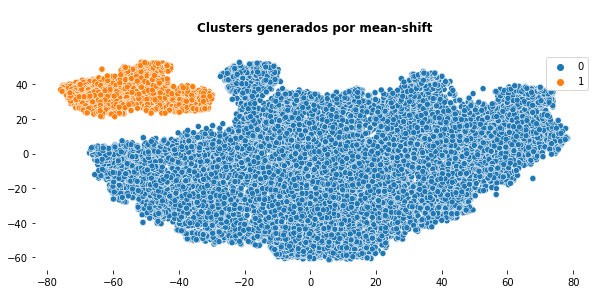

In [25]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=tsne_comp_1, y=tsne_comp_2, hue=ms.labels_)
sns.despine(left=True, bottom=True)
plt.title('\nClusters generados por mean-shift\n', fontweight='bold')
plt.show()

Con Mean-shift no pudimos lograr refinar los hiperparámetros para obtener buenos resultados. Se obtiene sólo un gran clusters 

### 4.3. Aglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster   import hierarchy                 as sch

In [27]:
ag_dict = {'n_clusters' : [4, 5, 6, 7, 8],
           'affinity'   : ['euclidean', 'manhattan' , 'cityblock'         ],
           'linkage'    : ['ward'     , 'complete'  , 'average', 'single' ]  
           }

In [28]:
# timempo de ejecución aprox = 8 min 
# se puede evitar la ejecución de esta celda en la siguiente 
from sklearn.model_selection import GridSearchCV, ShuffleSplit

model = AgglomerativeClustering()
cv=ShuffleSplit(test_size=0.20, n_splits=1)
gs = GridSearchCV(estimator=model, param_grid=ag_dict, 
                  scoring=cv_silhouette_scorer, cv=cv)
gs.fit(df_skills)
results = gs.cv_results_
make_dataframeCV(results)

param_affinity param_linkage param_n_clusters  \
10      euclidean       average                4   
30      manhattan       average                4   
50      cityblock       average                4   
15      euclidean        single                4   
0       euclidean          ward                4   
51      cityblock       average                5   
31      manhattan       average                5   
55      cityblock        single                4   
35      manhattan        single                4   
1       euclidean          ward                5   
32      manhattan       average                6   
52      cityblock       average                6   
25      manhattan      complete                4   
45      cityblock      complete                4   
11      euclidean       average                5   
5       euclidean      complete                4   
26      manhattan      complete                5   
46      cityblock      complete                5   
16      euclidean        single                5   
36      manhattan        single                5   
56      cityblock        single                5   
53      cityblock       average                7   
33      manhattan       average                7   
6       euclidean      complete                5   
7       euclidean      complete                6   
57      cityblock        single                6   
37      manhattan        single                6   
2       euclidean          ward                6   
12      euclidean       average                6   
8       euclidean      complete                7   
54      cityblock       average                8   
34      manhattan       average                8   
9       euclidean      complete                8   
3       euclidean          ward                7   
13      euclidean       average                7   
14      euclidean       average                8   
4       euclidean          ward                8   
17      euclidean        single                6   
27      manhattan      complete                6   
47      cityblock      complete                6   
18      euclidean        single                7   
58      cityblock        single                7   
38      manhattan        single                7   
19      euclidean        single                8   
48      cityblock      complete                7   
28      manhattan      complete                7   
49      cityblock      complete                8   
29      manhattan      complete                8   
39      manhattan        single                8   
59      cityblock        single                8   
20      manhattan          ward                4   
21      manhattan          ward                5   
22      manhattan          ward                6   
23      manhattan          ward                7   
24      manhattan          ward                8   
40      cityblock          ward                4   
41      cityblock          ward                5   
42      cityblock          ward                6   
43      cityblock          ward                7   
44      cityblock          ward                8   

                                               params  split0_test_score  \
10  {'affinity': 'euclidean', 'linkage': 'average'...           0.288599   
30  {'affinity': 'manhattan', 'linkage': 'average'...           0.284176   
50  {'affinity': 'cityblock', 'linkage': 'average'...           0.284176   
15  {'affinity': 'euclidean', 'linkage': 'single',...           0.246855   
0   {'affinity': 'euclidean', 'linkage': 'ward', '...           0.246280   
51  {'affinity': 'cityblock', 'linkage': 'average'...           0.239193   
31  {'affinity': 'manhattan', 'linkage': 'average'...           0.239193   
55  {'affinity': 'cityblock', 'linkage': 'single',...           0.232064   
35  {'affinity': 'manhattan', 'linkage': 'single',...           0.232064   
1   {'affinity': 'euclidean', 'linkage': 'ward', '...           0.2294

In [29]:
n_clusters = gs.best_params_['n_clusters']
affinity = gs.best_params_['affinity']
linkage = gs.best_params_['linkage']

# si no se ejecuta el GridSearch:
# n_clusters = 4
# affinity = 'manhattan'
# linkage = 'average'

ag = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity,
                             linkage=linkage).fit(X)

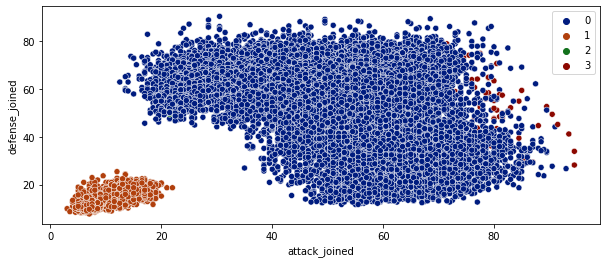

In [30]:
plt.figure(figsize=(10,4))
sns.scatterplot(df_skills.attack_joined, df_skills.defense_joined, 
            hue=ag.labels_, palette='dark')

Con Aglomerative Clustering no pudimos lograr refinar los hiperparámetros para obtener buenos resultados. Se obtienen un gran cluster que agruparía a defensores, mediocampistas y delanteros

### 4.4. Gaussian mixture

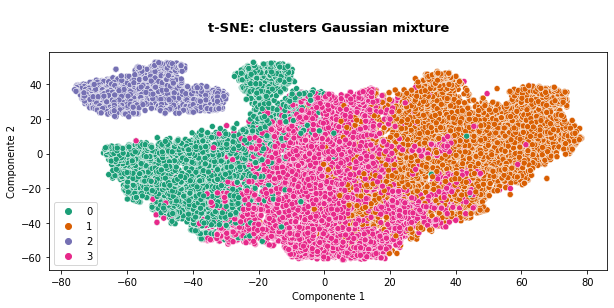

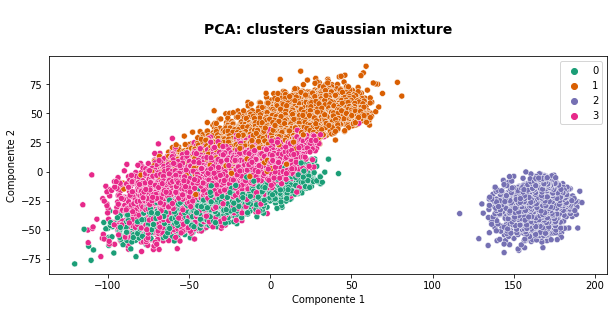

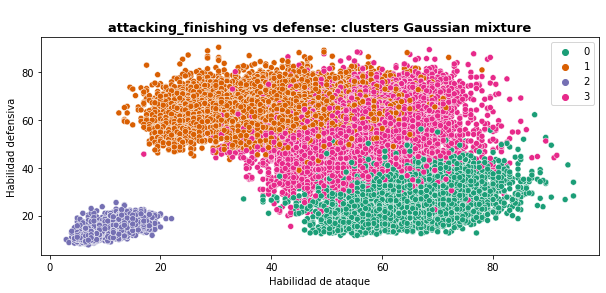

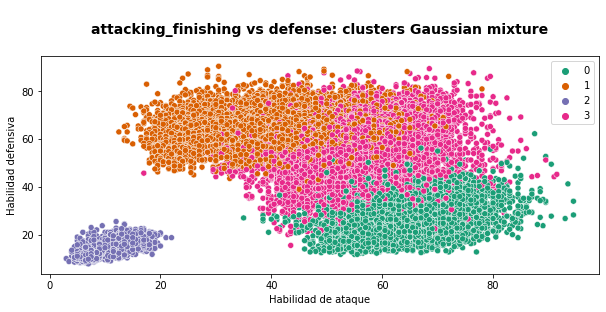

In [31]:
from sklearn import mixture

model = mixture.GaussianMixture(n_components=4, covariance_type='full', random_state=33)
model.fit(df_skills)

g_clusters = model.predict(df_skills)

plt.figure(figsize=(10, 4))
sns.scatterplot(x=tsne_comp_1, y=tsne_comp_2, 
                data=df_skills, hue=g_clusters, palette='Dark2')
plt.title('\nt-SNE: clusters Gaussian mixture\n', 
          fontsize=13, fontweight="bold")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()
plt.figure(figsize=(10, 4))
sns.scatterplot(x=pca_comp_1, y=pca_comp_2,
                hue=g_clusters, palette='Dark2')
plt.title('\nPCA: clusters Gaussian mixture\n', 
          fontsize=14, fontweight="bold")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(x=df_skills.attack_joined, y=df_skills.defense_joined, 
                data=df_skills, hue=g_clusters, palette='Dark2')
plt.title('\nattacking_finishing vs defense: clusters Gaussian mixture', 
          fontsize=13, fontweight="bold")
plt.xlabel('Habilidad de ataque')
plt.ylabel('Habilidad defensiva')
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(x=df_skills.attack_joined, y=df_skills.defense_joined,
                hue=g_clusters, palette='Dark2')
plt.title('\nattacking_finishing vs defense: clusters Gaussian mixture\n', 
          fontsize=14, fontweight="bold")
plt.xlabel('Habilidad de ataque')
plt.ylabel('Habilidad defensiva')
plt.show()

Con Gaussian mixture obtuvimos clusters con una forma coherente, similar a los clusters obtenidos con K-medias. Probablemente la distribución más o menos normal de las features en las diferentes variables (gráficos de kde realizados en el análisis exploratorio) puede llegar a haber contribuído a estos resultados.

En este sentido, en el código siguiente calculamos el accuracy_score de los clusters obtenidos utilizando como variable target a la posición general en el campo obteniendo un accuracy del 78% 

In [32]:
from sklearn.metrics import accuracy_score

y_true = df_skills_copy.player_position_general.copy()

y_true[y_true == 'def'] = 1
y_true[y_true == 'arq'] = 2
y_true[y_true == 'med'] = 3
y_true[y_true == 'del'] = 0

y_pred = g_clusters
y_true = np.asarray([i for i in y_true])

accuracy = accuracy_score(y_true, y_pred)
print('accuracy obtenido: ', round(accuracy*100))

accuracy obtenido:  78


### 4.5. DBSCAN

In [33]:
from sklearn.cluster          import DBSCAN
from sklearn                  import metrics
from sklearn.preprocessing    import StandardScaler

X            = StandardScaler().fit_transform(df_skills)
dbscan_dict  = {'eps'         : [1 , 2 , 4                            ],
                'min_samples' : [5 , 20, 50, 100 , 150, 250, 350, 500 ]
                }

model = DBSCAN()
cv=ShuffleSplit(test_size=0.20, n_splits=1)
gs = GridSearchCV(estimator=model, param_grid=dbscan_dict, 
                  scoring=cv_silhouette_scorer, cv=cv)
gs.fit(df_skills)
results = gs.cv_results_
make_dataframeCV(results)

param_eps param_min_samples                          params  \
0          1                 5    {'eps': 1, 'min_samples': 5}   
1          1                20   {'eps': 1, 'min_samples': 20}   
22         4               350  {'eps': 4, 'min_samples': 350}   
21         4               250  {'eps': 4, 'min_samples': 250}   
20         4               150  {'eps': 4, 'min_samples': 150}   
19         4               100  {'eps': 4, 'min_samples': 100}   
18         4                50   {'eps': 4, 'min_samples': 50}   
17         4                20   {'eps': 4, 'min_samples': 20}   
16         4                 5    {'eps': 4, 'min_samples': 5}   
15         2               500  {'eps': 2, 'min_samples': 500}   
14         2               350  {'eps': 2, 'min_samples': 350}   
13         2               250  {'eps': 2, 'min_samples': 250}   
12         2               150  {'eps': 2, 'min_samples': 150}   
11         2               100  {'eps': 2, 'min_samples': 100}   
10         2                50   {'eps': 2, 'min_samples': 50}   
9          2                20   {'eps': 2, 'min_samples': 20}   
8          2                 5    {'eps': 2, 'min_samples': 5}   
7          1               500  {'eps': 1, 'min_samples': 500}   
6          1               350  {'eps': 1, 'min_samples': 350}   
5          1               250  {'eps': 1, 'min_samples': 250}   
4          1               150  {'eps': 1, 'min_samples': 150}   
3          1               100  {'eps': 1, 'min_samples': 100}   
2          1                50   {'eps': 1, 'min_samples': 50}   
23         4               500  {'eps': 4, 'min_samples': 500}   

    split0_test_score  mean_test_score  std_test_score  rank_test_score  
0                -1.0             -1.0             0.0                1  
1                -1.0             -1.0             0.0                1  
22               -1.0             -1.0             0.0                1  
21               -1.0             -1.0             0.0                1  
20               -1.0             -1.0             0.0                1  
19               -1.0             -1.0             0.0                1  
18               -1.0             -1.0             0.0                1  
17               -1.0             -1.0             0.0                1  
16               -1.0             -1.0             0.0                1  
15               -1.0             -1.0             0.0                1  
14               -1.0             -1.0             0.0                1  
13               -1.0             -1.0             0.0                1  
12               -1.0             -1.0             0.0                1  
11               -1.0             -1.0             0.0                1  
10               -1.0             -1.0             0.0                1  
9                -1.0             -1.0             0.0                1  
8                -1.0             -1.0             0.0                1  
7                -1.0             -1.0             0.0                1  
6                -1.0             -1.0             0.0                1  
5                -1.0             -1.0             0.0                1  
4                -1.0             -1.0             0.0                1  
3                -1.0             -1.0             0.0                1  
2                -1.0             -1.0             0.0                1  
23               -1.0             -1.0             0.0                1

In [34]:
dbscan = DBSCAN(gs.best_params_['eps'], gs.best_params_['min_samples']).fit(X)

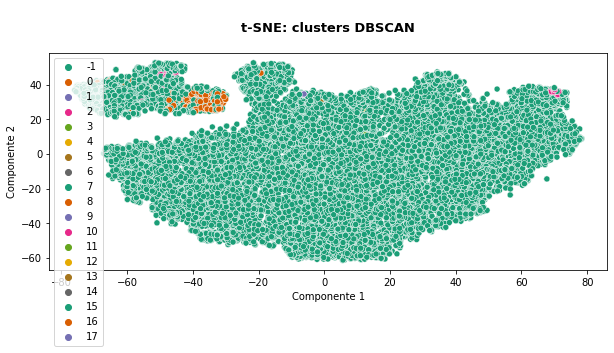

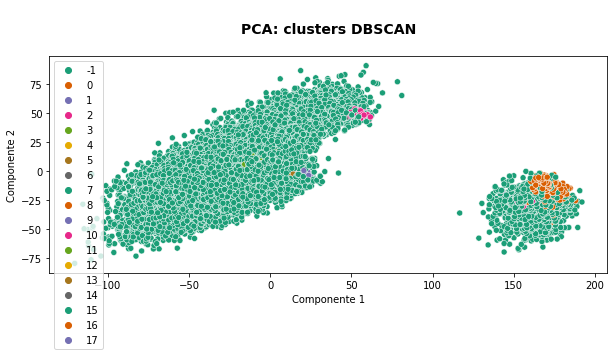

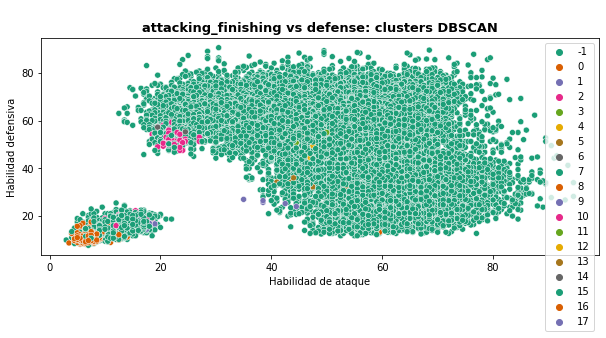

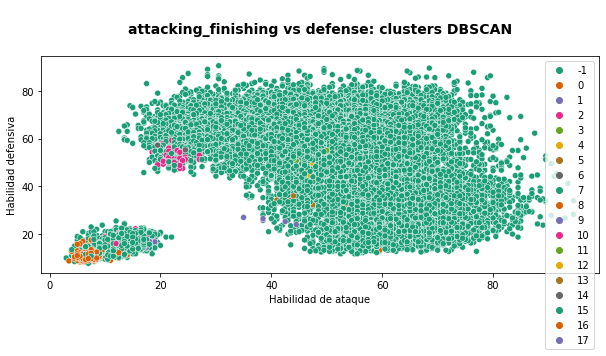

In [35]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=tsne_comp_1, y=tsne_comp_2, 
                data=df_skills, hue=dbscan.labels_, palette='Dark2')
plt.title('\nt-SNE: clusters DBSCAN\n', 
          fontsize=13, fontweight="bold")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()
plt.figure(figsize=(10, 4))
sns.scatterplot(x=pca_comp_1, y=pca_comp_2,
                hue=dbscan.labels_, palette='Dark2')
plt.title('\nPCA: clusters DBSCAN\n', 
          fontsize=14, fontweight="bold")
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(x=df_skills.attack_joined, y=df_skills.defense_joined, 
                data=df_skills, hue=dbscan.labels_, palette='Dark2')
plt.title('\nattacking_finishing vs defense: clusters DBSCAN', 
          fontsize=13, fontweight="bold")
plt.xlabel('Habilidad de ataque')
plt.ylabel('Habilidad defensiva')
plt.show()

plt.figure(figsize=(10, 4))
sns.scatterplot(x=df_skills.attack_joined, y=df_skills.defense_joined,
                hue=dbscan.labels_, palette='Dark2')
plt.title('\nattacking_finishing vs defense: clusters DBSCAN\n', 
          fontsize=14, fontweight="bold")
plt.xlabel('Habilidad de ataque')
plt.ylabel('Habilidad defensiva')
plt.show()

Con DBSCAN no pudimos lograr refinar los hiperparámetros para obtener buenos resultados. Se obtiene un sólo un gran clusters con varios pequeños.